In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


The judgement matrix for the indicator layer is:


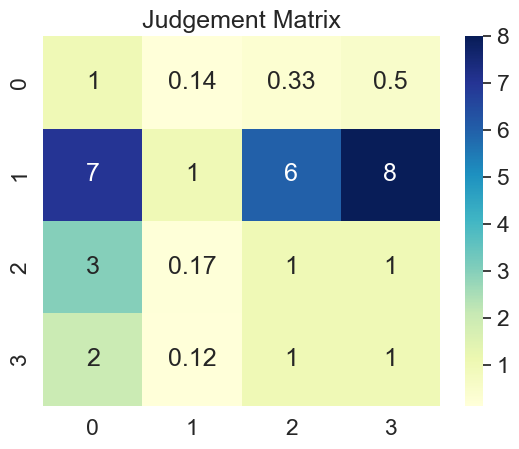

,history length,usage,tourist attraction,preseveration
0,1.0,0.142857,0.333333,0.5
1,7.0,1.000000,6.000000,8.0
2,3.0,0.166667,1.000000,1.0
3,2.0,0.125000,1.000000,1.0


In [3]:
# 定义评价指标
judge=pd.DataFrame(columns=['history length','usage','tourist attraction','preseveration'])
judge
value=np.array(
    [[1,1/7,1/3,1/2],
    [7,1,6,8],
    [3,1/6,1,1],
    [2,1/8,1,1]]
)
judge['history length']=value[:,0]
judge['usage']=value[:,1]
judge['tourist attraction']=value[:,2]
judge['preseveration']=value[:,3]
print("The judgement matrix for the indicator layer is:")
judge
# 用sns绘制出矩阵的图示
import seaborn as sns

sns.set(font_scale=1.5)
sns.heatmap(value, annot=True, cmap='YlGnBu')
plt.title('Judgement Matrix')
plt.savefig('result/Judgement Matrix.png', dpi=300, bbox_inches='tight')
plt.show()
judge

In [4]:
import numpy as np
import pandas as pd

# 将DataFrame转换为numpy数组
df_judge = judge.values
print(df_judge)

[[1.         0.14285714 0.33333333 0.5       ]
 [7.         1.         6.         8.        ]
 [3.         0.16666667 1.         1.        ]
 [2.         0.125      1.         1.        ]]


In [5]:
# 创建城市在目标层下的各个指标的判断矩阵
a = np.array([[1, 1 / 3, 1 / 8], [3, 1, 1 / 3], [8, 3, 1]])
b = np.array([[1, 2, 5], [1 / 2, 1, 2], [1 / 5, 1 / 2, 1]])
c = np.array([[1, 1, 3], [1, 1, 3], [1 / 3, 1 / 3, 1]])
d = np.array([[1, 3, 4], [1 / 3, 1, 1], [1 / 4, 1, 1]])

print("城市指标判断矩阵a:")
print(a)
print("城市指标判断矩阵b:")
print(b)
print("城市指标判断矩阵c:")
print(c)
print("城市指标判断矩阵d:")
print(d)

城市指标判断矩阵a:
[[1.         0.33333333 0.125     ]
 [3.         1.         0.33333333]
 [8.         3.         1.        ]]
城市指标判断矩阵b:
[[1.  2.  5. ]
 [0.5 1.  2. ]
 [0.2 0.5 1. ]]
城市指标判断矩阵c:
[[1.         1.         3.        ]
 [1.         1.         3.        ]
 [0.33333333 0.33333333 1.        ]]
城市指标判断矩阵d:
[[1.         3.         4.        ]
 [0.33333333 1.         1.        ]
 [0.25       1.         1.        ]]


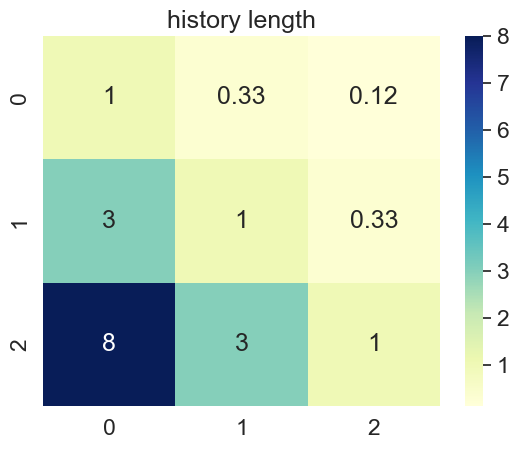

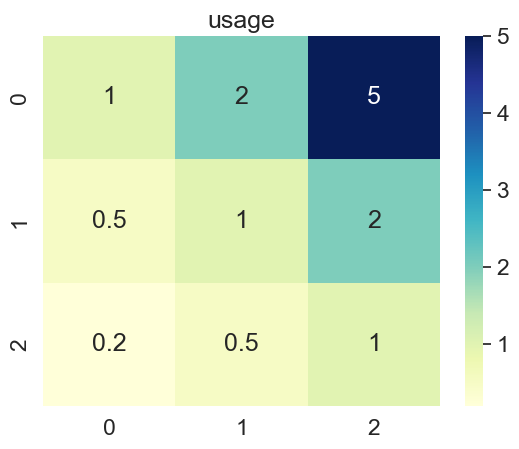

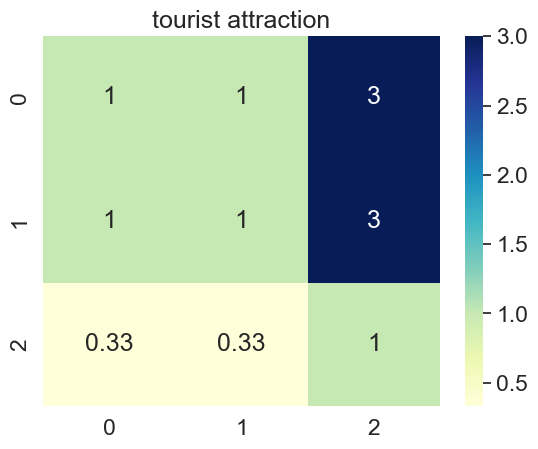

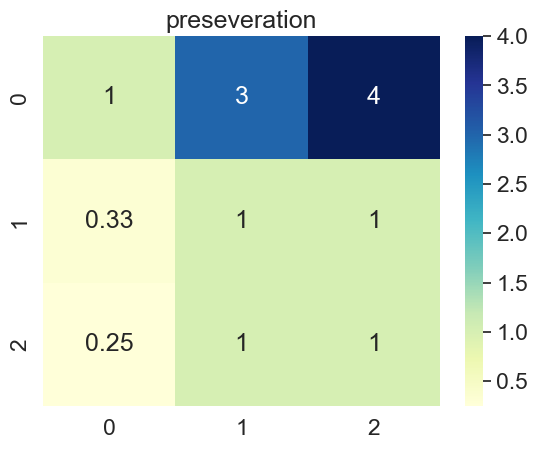

In [9]:
A=[[a,'history length'],[b,'usage'],[c,'tourist attraction'],[d,'preseveration']]
for i,name in A:
    i = np.array(i)
    sns.set(font_scale=1.5)
    sns.heatmap(i, annot=True, cmap='YlGnBu')
    plt.title(name)
    # 注明城市使用lengnd
    plt.savefig('result/'+name+'.png', dpi=300, bbox_inches='tight')
    plt.show()

In [7]:
import warnings
def calculate_weight(data):
    RI = (0, 0, 0.52, 0.89, 1.12, 1.26, 1.36, 1.41, 1.46, 1.49, 1.52, 1.54, 1.56, 1.58, 1.59)
    # 转化为array类型的对象
    in_matrix = np.array(data)
    n, n2 = in_matrix.shape
    # 判断矩阵是否为方阵，而且矩阵的大小为n，n2
    if n != n2:
        print("不是一个方阵，所以不能进行接下来的步骤")
        return None
    for i in range(0, n):
        for j in range(0, n2):
            if np.abs(in_matrix[i, j] * in_matrix[j, i] - 1) > 1e-7:
                raise ValueError("不为正互反矩阵")
    eig_values, eig_vectors = np.linalg.eig(in_matrix)
    # eigvalues为特征向量，eigvectors为特征值构成的对角矩阵（而且其他位置都为0，对角元素为特征值）
    max_index = np.argmax(eig_values)
    # argmax为获取最大特征值的下标,而且这里是获取实部
    max_eig = eig_values[max_index].real
    # 这里max_eig是最大的特征值
    eig_ = eig_vectors[:, max_index].real
    eig_ = eig_ / eig_.sum()
    if n > 15:
        CR = None
        warnings.warn(("无法判断一致性"))
    else:
        CI = (max_eig - n) / (n - 1)
        if RI[n - 1] != 0:
            CR = CI / RI[n - 1]
        if CR < 0.1:
            print("矩阵的一致性可以被接受")
        else:
            print("矩阵的一致性不能被接受")
    return max_eig, CR, eig_
 
 
# 特征值法求权重
def calculate_feature_weight(matrix, n):
    # 特征值法主要是通过求出矩阵的最大特征值和对应的特征向量，然后对其特征向量进行归一化，最后获得权重
    eigValue, eigVectors = np.linalg.eig(matrix)
    max_index = np.argmax(eigValue)
    max_eig = eigValue[max_index].real
    eig_ = eigVectors[:, max_index].real
    # 返回的是特征向量，而且max_index为最大的特征值，在这里一般为n
    eig_ = eig_ / eig_.sum()
    # 这里返回的是特征向量
    return eig_
 
 
# 算术平均法求权重
def calculate_arithemtic_mean(matrix):
    n = len(matrix)
    matrix_sum = sum(matrix)
    normalA = matrix / matrix_sum  # 归一化处理
    average_weight = []
    for i in range(0, n):
        # 按照列求和
        temSum = sum(normalA[i])
        average_weight.append(temSum / n)
    return np.array(average_weight)
 
 
# 几何平均法求权重
def calculate_metric_mean(metrix):
    n = len(metrix)
    # 1表示按照行相乘，得到一个新的列向量,每行相乘获得一个列向量，所以用prod函数，
    vector = np.prod(metrix, 1)
    tem = pow(vector, 1 / n)
    # 开n次方
    # 归一化处理
    average_weight = tem / sum(tem)
    return average_weight

In [8]:
criteria=judge
all=[a,b,c,d]
matrix_in = criteria
max_eigen, CR, criteria_eigen = calculate_weight(matrix_in)
print("准则层：最大特征值：{:.5f},CR={:<.5f},检验{}通过".format(max_eigen, CR, '' if CR < 0.1 else "不"))
print("准则层权重为{}\n".format(criteria_eigen))
max_eigen_list = []
CR_list = []
eigen_list = []
for i in all:
    max_eigen, CR, eigen = calculate_weight(i)
    max_eigen_list.append(max_eigen)
    CR_list.append(CR)
    eigen_list.append(eigen)
pd_print = pd.DataFrame(eigen_list, index=["criteria" + str(i) for i in range(0, criteria.shape[0])],
                        columns=["place" + str(i) for i in range(0, b[0].shape[0])])
pd_print.loc[:, 'Maximum eigenvalue'] = max_eigen_list
pd_print.loc[:, 'CR'] = CR_list
pd_print.loc[:, 'consistency test'] = pd_print.loc[:, 'CR'] < 0.1
print("method layer:")
print(pd_print)
# method = pd_print.values
# 目标层
# np.dot()函数为向量点积和矩阵乘法，即为AHP最后的目的是将准则层的的特征向量和方案层的特征向量进行矩阵乘法，而且最后是1*方案层的矩阵，
# criteria_eigen的shape为（1,5），而且eight_list为（5,3）的矩阵
# 而且reshape类似于转置矩阵的作用，所以使得原来为（5，）变成（1，5）
object = np.dot(criteria_eigen.reshape(1, -1), np.array(eigen_list))
print("\ntarget layer", object)
print("best choice{}".format(np.argmax(object)))
pd_print

矩阵的一致性可以被接受
准则层：最大特征值：4.11556,CR=0.04328,检验通过
准则层权重为[0.06396025 0.68977627 0.13439398 0.1118695 ]

矩阵的一致性可以被接受
矩阵的一致性可以被接受
矩阵的一致性可以被接受
矩阵的一致性可以被接受
method layer:
             place0    place1    place2  Maximum eigenvalue            CR  \
criteria0  0.081935  0.236341  0.681725            3.001542  1.482332e-03   
criteria1  0.595379  0.276350  0.128271            3.005535  5.322223e-03   
criteria2  0.428571  0.428571  0.142857            3.000000 -2.135044e-15   
criteria3  0.633708  0.191921  0.174371            3.009203  8.848762e-03   

           consistency test  
criteria0              True  
criteria1              True  
criteria2              True  
criteria3              True  

target layer [[0.54440889 0.28480388 0.17078722]]
best choice0


,place0,place1,place2,Maximum eigenvalue,CR,consistency test
criteria0,0.081935,0.236341,0.681725,3.001542,1.482332e-03,True
criteria1,0.595379,0.276350,0.128271,3.005535,5.322223e-03,True
criteria2,0.428571,0.428571,0.142857,3.000000,-2.135044e-15,True
criteria3,0.633708,0.191921,0.174371,3.009203,8.848762e-03,True
